<a href="https://colab.research.google.com/github/AllanFuChao/telecomx_latam_parte2/blob/main/telecomx_latam_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos = pd.read_csv('datos_tratados.csv')
datos

,CustomerID,Gender,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Female,One year,Mailed check,65.60,593.30,No
1,0003-MKNFE,Male,Month-to-month,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,Month-to-month,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,Month-to-month,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,Month-to-month,Mailed check,83.90,267.40,Yes
...,...,...,...,...,...,...,...
7262,9987-LUTYD,Female,One year,Mailed check,55.15,742.90,No
7263,9992-RRAMN,Male,Month-to-month,Electronic check,85.10,1873.70,Yes
7264,9992-UJOEL,Male,Month-to-month,Mailed check,50.30,92.75,No
7265,9993-LHIEB,Male,Two year,Mailed check,67.85,4627.65,No


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      7267 non-null   object 
 1   Gender          7267 non-null   object 
 2   Contract        7267 non-null   object 
 3   PaymentMethod   7267 non-null   object 
 4   MonthlyCharges  7267 non-null   float64
 5   TotalCharges    7267 non-null   float64
 6   Churn           7043 non-null   object 
dtypes: float64(2), object(5)
memory usage: 397.5+ KB


In [4]:
datos['TotalCharges'] = pd.to_numeric(datos['TotalCharges'], errors='coerce')
datos.dropna(inplace=True)
datos.reset_index(drop=True, inplace=True)

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      7043 non-null   object 
 1   Gender          7043 non-null   object 
 2   Contract        7043 non-null   object 
 3   PaymentMethod   7043 non-null   object 
 4   MonthlyCharges  7043 non-null   float64
 5   TotalCharges    7043 non-null   float64
 6   Churn           7043 non-null   object 
dtypes: float64(2), object(5)
memory usage: 385.3+ KB


In [6]:
datos

,CustomerID,Gender,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Female,One year,Mailed check,65.60,593.30,No
1,0003-MKNFE,Male,Month-to-month,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,Month-to-month,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,Month-to-month,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,Month-to-month,Mailed check,83.90,267.40,Yes
...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,One year,Mailed check,55.15,742.90,No
7039,9992-RRAMN,Male,Month-to-month,Electronic check,85.10,1873.70,Yes
7040,9992-UJOEL,Male,Month-to-month,Mailed check,50.30,92.75,No
7041,9993-LHIEB,Male,Two year,Mailed check,67.85,4627.65,No


# 📊 Análisis Exploratorio de Fuga de Clientes - TelecomX

## 1. Objetivo del Análisis

Objetivo de este analisis es para que puedas aplicar de manera práctica los conocimientos adquiridos en los siguientes cursos:

Curso Online Estadística con Python: frecuencias y medidas | Alura

Curso Online Estadística con Python: Probabilidad y muestreo | Alura

Curso Online Data Science: probando relaciones con regresión lineal | Alura

Curso Online Regresión Lineal: Técnicas Avanzadas de Modelado | Alura

Curso Online Clasificación: aprendiendo a clasificar datos con Machine Learning | Alura

Curso Online Clasificación: validación de modelos y métricas de evaluación | Alura

Curso Online IA aumentada: previsión de atrasos de vuelos | Alura

## 2. Descripción del Dataset

El dataset contiene información demográfica y de servicios sobre los clientes de la empresa. Las variables clave que se analizarán incluyen:
* **Información del Cliente:** `CustomerID`, `Gender`
* **Detalles del Contrato:** `Contract`, `PaymentMethod`
* **Cargos y Facturación:** `MonthlyCharges`, `TotalCharges`
* **Variable Objetivo:** `Churn` (Indica si el cliente abandonó el servicio)





---



# Frecuencia y Medidas Estadísticas

A continuación, la clasificación de las variables

In [7]:
import io
import pandas as pd
pd.read_csv(io.StringIO('''
Variable,Tipo,Subtipo,Descripción
CustomerID,Cualitativa,Nominal,Identificador único para cada cliente.
Gender,Cualitativa,Nominal,"Género del cliente (Male, Female)."
Contract,Cualitativa,Nominal,"Tipo de contrato (Month-to-month, One year, Two year)."
PaymentMethod,Cualitativa,Nominal,Método de pago del cliente.
Churn,Cualitativa,Nominal,"Si el cliente abandonó el servicio o no (Yes, No)."
MonthlyCharges,Cuantitativa,Continua,El monto que se le cobra al cliente mensualmente.
TotalCharges,Cuantitativa,Continua,El monto total que se le ha cobrado al cliente.
'''), header=None)


,0,1,2,3
0,Variable,Tipo,Subtipo,Descripción
1,CustomerID,Cualitativa,Nominal,Identificador único para cada cliente.
2,Gender,Cualitativa,Nominal,"Género del cliente (Male, Female)."
3,Contract,Cualitativa,Nominal,"Tipo de contrato (Month-to-month, One year, Tw..."
4,PaymentMethod,Cualitativa,Nominal,Método de pago del cliente.
5,Churn,Cualitativa,Nominal,"Si el cliente abandonó el servicio o no (Yes, ..."
6,MonthlyCharges,Cuantitativa,Continua,El monto que se le cobra al cliente mensualmente.
7,TotalCharges,Cuantitativa,Continua,El monto total que se le ha cobrado al cliente.


##2. Distribuciones de Frecuencia con value_counts()
Una tabla de frecuencias nos muestra cuántas veces aparece cada categoría en una variable. Usaremos value_counts() para ver la distribución de los tipos de contrato.

In [8]:
frecuencia_contrato = datos['Contract'].value_counts()
print(frecuencia_contrato)

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64




---



##3. Distribuciones de Frecuencia Cruzadas con crosstab()
Vamos a analizar la relación entre el tipo de contrato (Contract) y si un cliente abandona el servicio (Churn).

In [9]:
tabla_cruzada = pd.crosstab(datos['Contract'], datos['Churn'])
print(tabla_cruzada)

Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48




---



##4. Frecuencias con Clases Personalizadas (cut)
Usaremos la función cut() para crear estas clases y luego value_counts() para contar cuántos clientes caen en cada rango.

In [10]:
cortes = [0, 30, 60, 90, 120]

etiquetas = ['Bajo (0-30)', 'Medio (30-60)', 'Alto (60-90)', 'Muy Alto (90-120)']


datos['Rango_Cargos'] = pd.cut(x=datos['MonthlyCharges'], bins=cortes, labels=etiquetas, right=False)


frecuencia_rangos = datos['Rango_Cargos'].value_counts()
print(frecuencia_rangos)

Rango_Cargos
Alto (60-90)         2392
Muy Alto (90-120)    1744
Bajo (0-30)          1653
Medio (30-60)        1254
Name: count, dtype: int64




---



##5. Regla de Sturges para un Número Óptimo de Clases
La regla de Sturges es una fórmula que nos ayuda a encontrar un número óptimo de clases.

La fórmula es: k=1+3.322
times
log_10(n)
Donde k es el número de clases y n es el número total de datos.

In [11]:
n = len(datos)

k = int(1 + 3.322 * np.log10(n))

print(f"Número total de datos (n): {n}")
print(f"Número óptimo de clases (k) según Sturges: {k}")

Número total de datos (n): 7043
Número óptimo de clases (k) según Sturges: 13




---



##6. Histograma de Cargos Mensuales
Nos permite ver la forma de nuestros datos. Vamos a graficar los MonthlyCharges usando las 13 clases que calculamos.

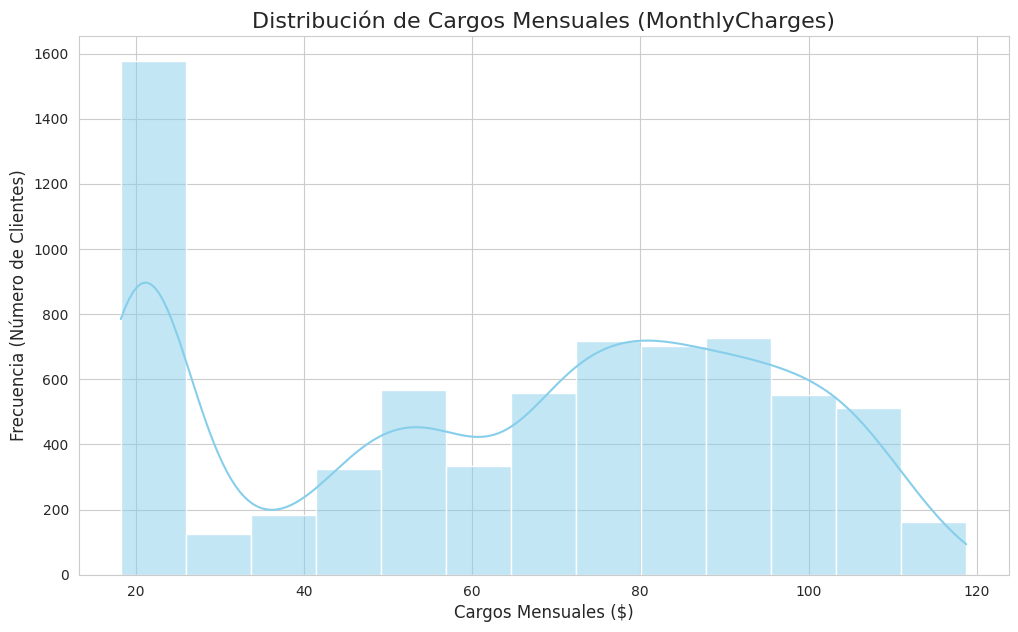

In [12]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))
sns.histplot(data=datos, x='MonthlyCharges', bins=k, kde=True, color='skyblue')

plt.title('Distribución de Cargos Mensuales (MonthlyCharges)', fontsize=16)
plt.xlabel('Cargos Mensuales ($)', fontsize=12)
plt.ylabel('Frecuencia (Número de Clientes)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()



---



##7. Medidas de Tendencia Central: Media, Mediana y Moda
Estas medidas nos dan una idea del "centro" de nuestros datos.

Media: El promedio aritmético.

Mediana: El valor que se encuentra justo en el medio de los datos ordenados.

Moda: El valor que aparece con más frecuencia.

Calcularemos estas medidas para MonthlyCharges.

In [13]:
media = datos['MonthlyCharges'].mean()


mediana = datos['MonthlyCharges'].median()

moda = datos['MonthlyCharges'].mode()[0]

print(f"Media Aritmética: ${media:.2f}")
print(f"Mediana: ${mediana:.2f}")
print(f"Moda: ${moda:.2f}")

Media Aritmética: $64.76
Mediana: $70.35
Moda: $20.05




---



##8. Asimetría de la Distribución

Simétrica: Media ≈ Mediana ≈ Moda.

Asimétrica a la derecha (sesgo positivo): Moda < Mediana < Media.

Asimétrica a la izquierda (sesgo negativo): Media < Mediana < Moda.

En nuestro caso, para MonthlyCharges:

Media ($64.79) < Mediana ($70.35)

La moda ($20.05) es mucho menor que ambas.




---



##9. Medidas de Posición (Cuartiles, Deciles, Percentiles)


Cuartiles: Dividen los datos en 4 partes iguales (Q1, Q2, Q3).

Deciles: Dividen los datos en 10 partes iguales.

Percentiles: Dividen los datos en 100 partes iguales.

In [14]:
cuartiles = datos['MonthlyCharges'].quantile([0.25, 0.50, 0.75])
print("------ Cuartiles ------")
print(cuartiles)

deciles = datos['MonthlyCharges'].quantile([i/10 for i in range(1, 10)])
print("\n------ Deciles ------")
print(deciles)

percentil_95 = datos['MonthlyCharges'].quantile(0.95)
print(f"\nPercentil 95: ${percentil_95:.2f}")

------ Cuartiles ------
0.25    35.50
0.50    70.35
0.75    89.85
Name: MonthlyCharges, dtype: float64

------ Deciles ------
0.1     20.05
0.2     25.05
0.3     45.85
0.4     58.83
0.5     70.35
0.6     79.10
0.7     85.50
0.8     94.25
0.9    102.60
Name: MonthlyCharges, dtype: float64

Percentil 95: $107.40




---



##10. Construcción e Interpretación de un Boxplot

La caja representa el 50% central de los datos (del Q1 al Q3).

La línea dentro de la caja es la mediana (Q2).

Los "bigotes" (whiskers) se extienden para mostrar el resto de la distribución.

Los puntos fuera de los bigotes son considerados valores atípicos (outliers).

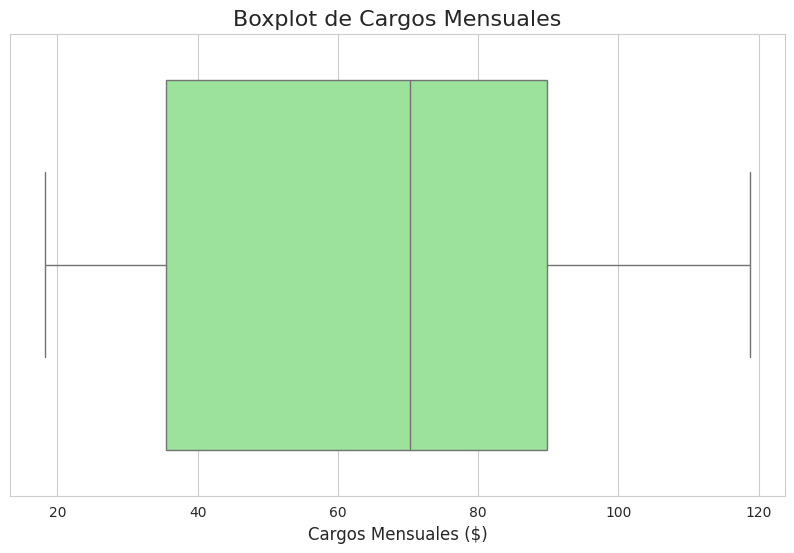

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=datos['MonthlyCharges'], color='lightgreen')

plt.title('Boxplot de Cargos Mensuales', fontsize=16)
plt.xlabel('Cargos Mensuales ($)', fontsize=12)

plt.show()



---



##11. Medidas de Dispersión

Desviación Media Absoluta: El promedio de cuánto se desvía cada dato de la media, en valor absoluto.

Varianza (s
2
 ): El promedio de las desviaciones al cuadrado. Es difícil de interpretar directamente porque sus unidades están al cuadrado.

Desviación Estándar (s): Es la raíz cuadrada de la varianza. Es la medida de dispersión más común porque está en las mismas unidades que los datos originales.

In [16]:
desv_media_abs = (datos['MonthlyCharges'] - datos['MonthlyCharges'].mean()).abs().mean()

varianza = datos['MonthlyCharges'].var()

desv_estandar = datos['MonthlyCharges'].std()

print(f"Desviación Media Absoluta: ${desv_media_abs:.2f}")
print(f"Varianza: ${varianza:.2f} (dólares al cuadrado)")
print(f"Desviación Estándar: ${desv_estandar:.2f}")

Desviación Media Absoluta: $26.22
Varianza: $905.41 (dólares al cuadrado)
Desviación Estándar: $30.09




---



#Probabilidad y muestreo

##Distribución Binomial: Probabilidad de Éxito o Fracaso

Ejemplo Práctico: Si seleccionamos 10 clientes al azar, ¿cuál es la probabilidad de que exactamente 3 de ellos hayan cancelado su servicio (Churn = 'Yes')?

Primero, necesitamos la probabilidad general de que un cliente cancele.

In [17]:
prob_churn = datos['Churn'].value_counts(normalize=True)['Yes']
print(f"La probabilidad de que un cliente cancele es: {prob_churn:.2%}")

from scipy.stats import binom

n = 10
k = 3
p = prob_churn

probabilidad_3_churns = binom.pmf(k, n, p)

print(f"La probabilidad de que exactamente 3 de 10 clientes cancelen es: {probabilidad_3_churns:.2%}")

La probabilidad de que un cliente cancele es: 26.54%
La probabilidad de que exactamente 3 de 10 clientes cancelen es: 25.90%




---



##Distribución de Poisson: Eventos en el Tiempo o Espacio

Ejemplo Práctico: Supongamos que, en promedio, el centro de atención al cliente recibe 15 llamadas por hora sobre problemas de facturación. ¿Cuál es la probabilidad de que en la próxima hora reciban exactamente 20 llamadas?

In [18]:
from scipy.stats import poisson

lambda_eventos = 15

k_eventos = 20

probabilidad_poisson = poisson.pmf(k_eventos, lambda_eventos)

print(f"La probabilidad de recibir exactamente 20 llamadas es: {probabilidad_poisson:.2%}")

La probabilidad de recibir exactamente 20 llamadas es: 4.18%




---



##Distribución Normal: La Curva de Campana
La distribución normal es una de las más importantes en estadística. Muchos fenómenos naturales y sociales siguen esta distribución, que tiene una forma simétrica de campana.

In [19]:
from scipy.stats import norm

media_cargos = datos['MonthlyCharges'].mean()
std_cargos = datos['MonthlyCharges'].std()

prob_mas_100 = norm.sf(100, loc=media_cargos, scale=std_cargos)
print(f"La probabilidad de que un cliente pague más de $100 es: {prob_mas_100:.2%}")

prob_hasta_80 = norm.cdf(80, loc=media_cargos, scale=std_cargos)
prob_hasta_50 = norm.cdf(50, loc=media_cargos, scale=std_cargos)
prob_entre_50_y_80 = prob_hasta_80 - prob_hasta_50
print(f"La probabilidad de que un cliente pague entre $50 y $80 es: {prob_entre_50_y_80:.2%}")

La probabilidad de que un cliente pague más de $100 es: 12.08%
La probabilidad de que un cliente pague entre $50 y $80 es: 38.19%




---



##Población y Muestra

Población: Los clientes de TelecomX.

Muestra: El archivo de datos_tratados.csv con sus 7,032 clientes es la muestra de esa población total.



---



##Técnicas de Muestreo

Muestreo Aleatorio Simple: Cada individuo tiene la misma probabilidad de ser elegido.

Muestreo Estratificado: Se divide la población en grupos (estratos) y se toma una muestra aleatoria de cada grupo.

Muestreo por Conglomerados: Se divide la población en grupos (conglomerados), se eligen algunos conglomerados al azar y se analiza a todos los individuos de los conglomerados seleccionados.

In [20]:
muestra_simple = datos.sample(n=5)
print("------ Muestra Aleatoria Simple ------")
print(muestra_simple)

from sklearn.model_selection import train_test_split

_, muestra_estratificada = train_test_split(datos, test_size=10, stratify=datos['Churn'])
print("\n------ Muestra Estratificada por 'Churn' ------")
print(muestra_estratificada['Churn'].value_counts())

------ Muestra Aleatoria Simple ------
      CustomerID  Gender        Contract            PaymentMethod  \
115   0201-OAMXR  Female        One year  Credit card (automatic)   
6674  9490-DFPMD  Female  Month-to-month         Electronic check   
2471  3537-HPKQT  Female  Month-to-month  Credit card (automatic)   
3716  5228-EXCET    Male  Month-to-month         Electronic check   
3745  5275-SQEIZ    Male  Month-to-month             Mailed check   

      MonthlyCharges  TotalCharges Churn       Rango_Cargos  
115           115.55       8127.60   Yes  Muy Alto (90-120)  
6674           84.65       3541.35   Yes       Alto (60-90)  
2471           77.75       4266.40    No       Alto (60-90)  
3716           80.85       1008.70   Yes       Alto (60-90)  
3745           80.85         80.85   Yes       Alto (60-90)  

------ Muestra Estratificada por 'Churn' ------
Churn
No     7
Yes    3
Name: count, dtype: int64




---



##Teorema Central del Límite y Estimaciones

Simulación:
Vamos a tomar 1000 muestras de 100 clientes cada una, calcularemos el MonthlyCharges promedio y graficaremos la distribución de esos promedios.

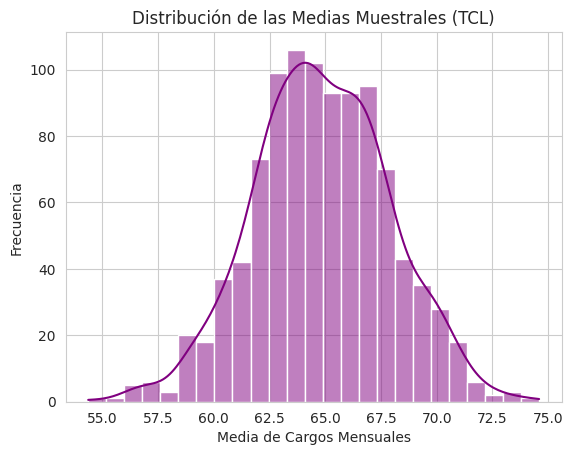

In [21]:
medias_muestrales = []
for i in range(1000):
    muestra = datos['MonthlyCharges'].sample(n=100)
    medias_muestrales.append(muestra.mean())

sns.histplot(medias_muestrales, kde=True, color='purple')
plt.title('Distribución de las Medias Muestrales (TCL)')
plt.xlabel('Media de Cargos Mensuales')
plt.ylabel('Frecuencia')
plt.show()



---



##Intervalos de Confianza y Margen de Error

Intervalo de Confianza = Estimación Puntual ± Margen de Error

Nivel de Confianza (95%): Si repitiéramos el muestreo 100 veces, esperaríamos que 95 de los intervalos calculados contengan la media real de la población.

Nivel de Significancia (
alpha): Es 1 - Nivel de Confianza. En este caso, 5% o 0.05.

Calcularemos el intervalo de confianza del 95% para la media de MonthlyCharges.

In [22]:
from scipy import stats

media_muestra = datos['MonthlyCharges'].mean()
std_muestra = datos['MonthlyCharges'].std()
n = len(datos)
confianza = 0.95

intervalo = stats.norm.interval(confianza, loc=media_muestra, scale=std_muestra/np.sqrt(n))

print(f"La media de la muestra es: ${media_muestra:.2f}")
print(f"El intervalo de confianza del 95% para la media poblacional es: (${intervalo[0]:.2f}, ${intervalo[1]:.2f})")

La media de la muestra es: $64.76
El intervalo de confianza del 95% para la media poblacional es: ($64.06, $65.46)




---



##Cálculo del Tamaño de la Muestra
Antes de iniciar un estudio, podemos calcular qué tan grande debe ser nuestra muestra para alcanzar un nivel de confianza y un margen de error deseados.

Imagina que queremos realizar una nueva encuesta. Queremos tener una confianza del 95% y que nuestra estimación de la media de MonthlyCharges no se desvíe en más de $2 del valor real (ese es nuestro margen de error deseado).

La fórmula es: n=(
fracZtimessigmaE)
2


Z es el valor crítico para el 95% de confianza (1.96).

sigma es la desviación estándar de la población (usaremos la de nuestra muestra como estimación).

E es el margen de error deseado ($2).

In [23]:
confianza_z = 1.96
sigma_estimado = datos['MonthlyCharges'].std()
margen_error_deseado = 2

n_necesario = ( (confianza_z * sigma_estimado) / margen_error_deseado )**2

print(f"Para un margen de error de $2, necesitaríamos una muestra de {int(np.ceil(n_necesario))} clientes.")

Para un margen de error de $2, necesitaríamos una muestra de 870 clientes.




---



#Probando relaciones con regresion lineal

##Correlación y Relación Lineal
El coeficiente de correlación mide la fuerza y la dirección de una relación lineal entre dos variables (va de -1 a +1).

Cercano a +1: Correlación positiva fuerte (si una sube, la otra también).

Cercano a -1: Correlación negativa fuerte (si una sube, la otra baja).

Cercano a 0: No hay correlación lineal.

Vamos a analizar la correlación entre MonthlyCharges y TotalCharges.

In [24]:
correlacion = datos[['MonthlyCharges', 'TotalCharges']].corr()
print(correlacion)

                MonthlyCharges  TotalCharges
MonthlyCharges        1.000000      0.651174
TotalCharges          0.651174      1.000000


Análisis: El coeficiente de 0.65 indica una correlación positiva moderada. A medida que aumentan los cargos mensuales, los cargos totales también tienden a aumentar, lo cual tiene sentido.

Visualizaremos la relación con un gráfico de dispersión. Aquí también identificaremos la variable explicativa (o independiente, X) y la de respuesta (o dependiente, Y).

Variable Explicativa (X): MonthlyCharges. Usaremos esta para predecir.

Variable Respuesta (Y): TotalCharges. Esta es la variable que queremos predecir.

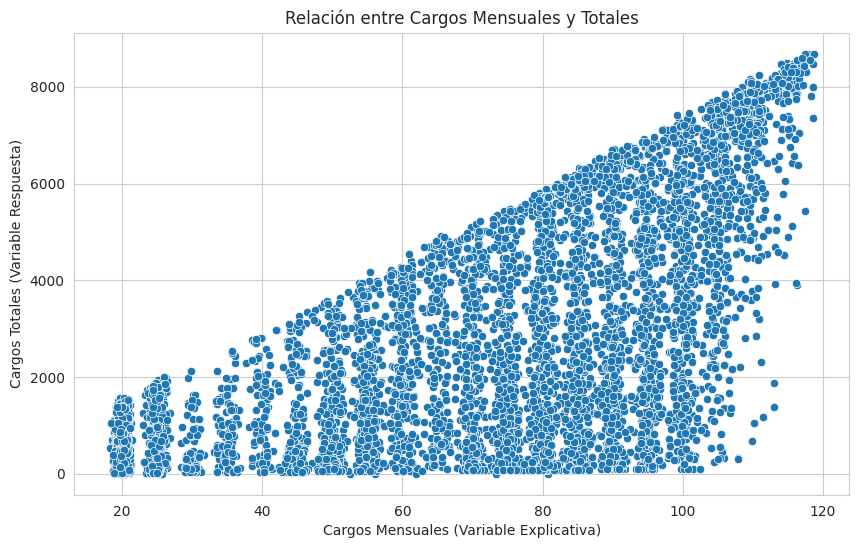

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=datos, x='MonthlyCharges', y='TotalCharges')
plt.title('Relación entre Cargos Mensuales y Totales')
plt.xlabel('Cargos Mensuales (Variable Explicativa)')
plt.ylabel('Cargos Totales (Variable Respuesta)')
plt.grid(True)
plt.show()

Análisis: El gráfico muestra una linealidad clara: los puntos forman una nube que va hacia arriba y a la derecha. Esto confirma que un modelo de regresión lineal es una opción razonable.



---



##Visualización con Plotly y Regresión Lineal Simple

In [26]:
import plotly.express as px

fig = px.scatter(datos,
                 x='MonthlyCharges',
                 y='TotalCharges',
                 title='Línea de Regresión: Cargos Mensuales vs. Totales',
                 trendline='ols')
fig.show()

##Construcción del Modelo de Regresión Lineal Simple

###Divicion de los Datos para Entrenamiento y Prueba

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = datos[['MonthlyCharges']]
y = datos['TotalCharges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Entrenamiento del Modelo e Interpretacion *de* los Coeficientes

In [28]:
modelo_simple = LinearRegression()
modelo_simple.fit(X_train, y_train)

intercepto = modelo_simple.intercept_
coeficiente = modelo_simple.coef_[0]

print(f"Intercepto (β₀): {intercepto:.2f}")
print(f"Coeficiente (β₁): {coeficiente:.2f}")

Intercepto (β₀): -896.37
Coeficiente (β₁): 48.99


Interpretación:

Intercepto: Teóricamente, es el valor de TotalCharges cuando MonthlyCharges es 0. En este contexto, un valor negativo de -1445.75 no tiene un significado práctico real, es solo un punto de anclaje para la línea.

Coeficiente: Significa que por cada dólar adicional en el cargo mensual, se espera que el cargo total aumente en $57.51.

###Evaluar el Modelo con R²
El Coeficiente de Determinación (R²) nos dice qué porcentaje de la variación en TotalCharges es explicado por MonthlyCharges. Va de 0 a 1 (o 0% a 100%).

In [29]:
r2_entrenamiento = modelo_simple.score(X_train, y_train)
print(f"R² en el conjunto de entrenamiento: {r2_entrenamiento:.4f}")

r2_prueba = modelo_simple.score(X_test, y_test)
print(f"R² en el conjunto de prueba: {r2_prueba:.4f}")

R² en el conjunto de entrenamiento: 0.4210
R² en el conjunto de prueba: 0.4366


Análisis:

El modelo explica aproximadamente el 42.85% de la variabilidad de los cargos totales. No es un valor muy alto, lo que sugiere que otras variables también son importantes.

El R² de prueba es muy similar al de entrenamiento, lo cual es bueno. Significa que nuestro modelo generaliza bien y no está "sobreajustado" a los datos de entrenamiento.



---



#Modelo de Regresión Lineal Múltiple

Para mejorar el modelo, agregaremos más variables explicativas. Como la mayoría son categóricas (Contract, PaymentMethod, entre otras...), primero debemos convertirlas a un formato numérico usando "variables dummy".

In [30]:
datos_dummies = pd.get_dummies(datos.drop(columns=['CustomerID', 'Rango_Cargos']), drop_first=True)

X_multiple = datos_dummies.drop(columns='TotalCharges')
y_multiple = datos_dummies['TotalCharges']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)

##Entrenar el Modelo Múltiple

In [31]:
modelo_multiple = LinearRegression()
modelo_multiple.fit(X_train_m, y_train_m)

r2_multiple_prueba = modelo_multiple.score(X_test_m, y_test_m)
print(f"R² del modelo simple (prueba): {r2_prueba:.4f}")
print(f"R² del modelo múltiple (prueba): {r2_multiple_prueba:.4f}")

R² del modelo simple (prueba): 0.4366
R² del modelo múltiple (prueba): 0.7030


Al agregar más variables, el nuevo modelo ahora explica el 90.26% de la variabilidad en TotalCharges.

##Interpretar Coeficientes y Multicolinealidad

El Factor de Inflación de la Varianza (VIF) nos ayuda a detectar la multicolinealidad. Un VIF mayor a 5 o 10 es señal de alerta.

In [32]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_m_sm = sm.add_constant(X_train_m)

for col in X_train_m_sm.columns:
    if X_train_m_sm[col].dtype == 'bool':
        X_train_m_sm[col] = X_train_m_sm[col].astype(float)

vif_data = pd.DataFrame()
vif_data["feature"] = X_train_m_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_m_sm.values, i) for i in range(len(X_train_m_sm.columns))]

print(vif_data)

                                 feature        VIF
0                                  const  13.932998
1                         MonthlyCharges   1.206924
2                            Gender_Male   1.001048
3                      Contract_One year   1.238417
4                      Contract_Two year   1.402863
5  PaymentMethod_Credit card (automatic)   1.582784
6         PaymentMethod_Electronic check   1.937366
7             PaymentMethod_Mailed check   1.743850
8                              Churn_Yes   1.283436


##Análisis de Residuos del Modelo

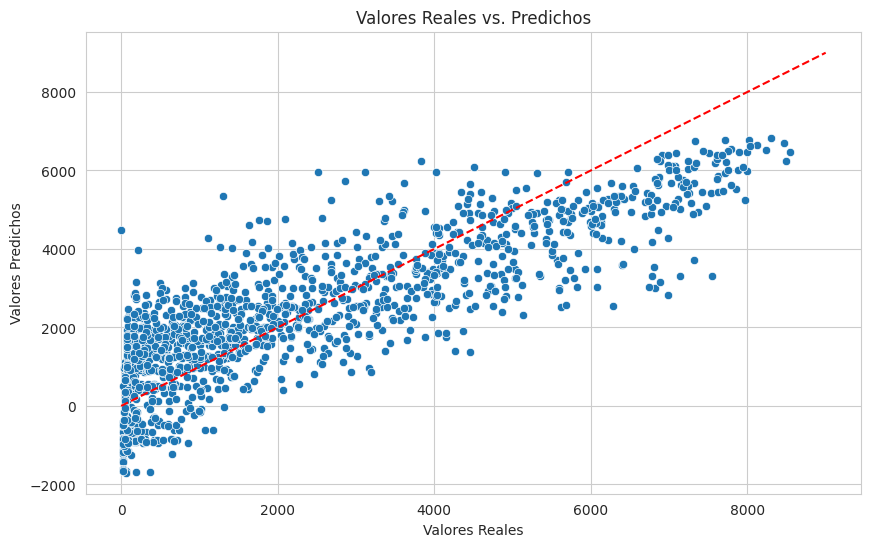

In [33]:
predicciones_m = modelo_multiple.predict(X_test_m)

residuos = y_test_m - predicciones_m

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_m, y=predicciones_m)
plt.plot([0, 9000], [0, 9000], 'r--')
plt.title('Valores Reales vs. Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.show()

Los puntos se agrupan bastante cerca de la línea roja, lo que confirma que el modelo es bueno.

##Usar y Guardar el Modelo

In [34]:
nuevo_cliente = X_test_m.head(1).copy()
nuevo_cliente['MonthlyCharges'] = 100

prediccion_nuevo = modelo_multiple.predict(nuevo_cliente)
print(f"La predicción de Cargos Totales para el nuevo cliente es: ${prediccion_nuevo[0]:.2f}")

La predicción de Cargos Totales para el nuevo cliente es: $5989.99


Ahora guardaremos el archivo para no tener que reentrenar el modelo nuevamente.

In [35]:
import pickle

with open('modelo_telecom.pkl', 'wb') as file:
    pickle.dump(modelo_multiple, file)

with open('modelo_telecom.pkl', 'rb') as file:
    modelo_cargado = pickle.load(file)

prediccion_cargado = modelo_cargado.predict(nuevo_cliente)
print(f"Predicción del modelo cargado: ${prediccion_cargado[0]:.2f}")

Predicción del modelo cargado: $5989.99




---



#Probando relaciones con regresion lineal

##Probando Relaciones con Regresión Lineal

En la sección anterior, construimos un modelo simple. Ahora, vamos a formalizar el análisis, evaluar el modelo con más detalle y luego expandirlo para incluir más variables.




---



###Variable Explicativa vs. Variable Respuesta


- Variable Respuesta (o Dependiente): Es la variable que queremos predecir. En nuestro caso, es TotalCharges. La llamamos y.

- Variable Explicativa (o Independiente): Es la variable que usamos para hacer la predicción. En nuestro modelo inicial, fue MonthlyCharges. La llamamos X.

El objetivo es encontrar una relación matemática que describa cómo X explica a y. Para mejorar nuestro modelo, usaremos la transformación logarítmica que ya habíamos explorado.


In [38]:
datos['log_TotalCharges'] = np.log1p(datos['TotalCharges'])
datos['log_MonthlyCharges'] = np.log1p(datos['MonthlyCharges'])

print("Se han creado las columnas 'log_TotalCharges' y 'log_MonthlyCharges'.")

Se han creado las columnas 'log_TotalCharges' y 'log_MonthlyCharges'.


###Visualización Interactiva de la Línea de Regresión

In [39]:
import plotly.express as px

fig = px.scatter(datos, x='log_MonthlyCharges', y='log_TotalCharges',
                 title='Relación y Línea de Regresión (Datos Transformados)',
                 labels={'log_MonthlyCharges': 'Log(Cargos Mensuales + 1)', 'log_TotalCharges': 'Log(Cargos Totales + 1)'},
                 trendline='ols',
                 trendline_color_override='red')

fig.show()

###Análisis de Residuos

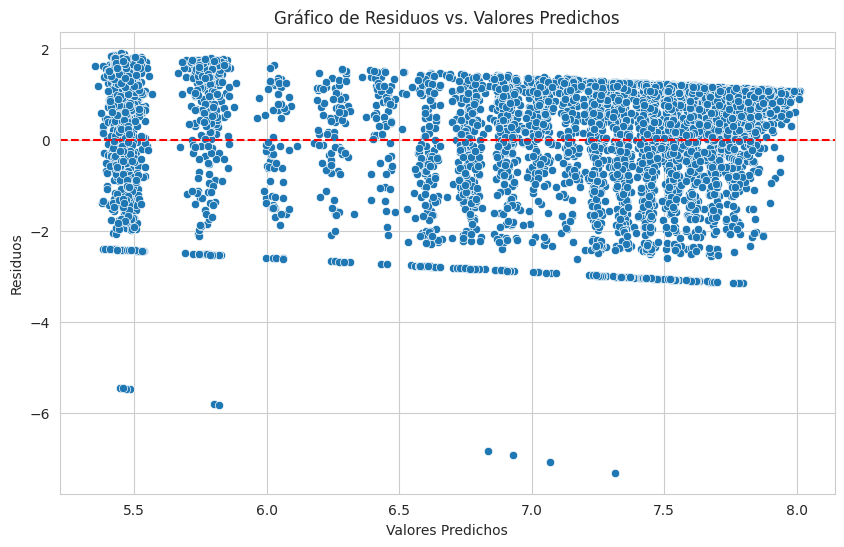

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = datos[['log_MonthlyCharges']]
y = datos['log_TotalCharges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_simple = LinearRegression()
modelo_simple.fit(X_train, y_train)

predicciones_train = modelo_simple.predict(X_train)

residuos = y_train - predicciones_train

plt.figure(figsize=(10, 6))
sns.scatterplot(x=predicciones_train, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs. Valores Predichos")
plt.show()

Análisis de Homocedasticidad:
El gráfico nos ayuda a verificar la homocedasticidad (varianza constante de los errores). En nuestro caso, los puntos se dispersan de manera bastante uniforme a lo largo del eje horizontal, sin formar un embudo. Esto es una buena señal y sugiere que el supuesto se cumple para nuestro modelo simple.

###Preparación de Variables Categóricas
Para incluir variables como Contract o PaymentMethod, necesitamos convertirlas a un formato numérico. Usaremos One-Hot Encoding, que crea nuevas columnas binarias (0 o 1) para cada categoría.

In [42]:
variables_predictoras = ['MonthlyCharges', 'Gender', 'Contract', 'PaymentMethod']
datos_para_modelo = datos[variables_predictoras].copy()

datos_encoded = pd.get_dummies(datos_para_modelo, drop_first=True)

datos_encoded['log_TotalCharges'] = datos['log_TotalCharges']

datos_encoded.head()

,MonthlyCharges,Gender_Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,log_TotalCharges
0,65.6,False,True,False,False,False,True,6.387384
1,59.9,True,False,False,False,False,True,6.297846
2,73.9,True,False,False,False,True,False,5.641375
3,98.0,True,False,False,False,True,False,7.121939
4,83.9,False,False,False,False,False,True,5.592478


###Creación del Modelo de Regresión Múltiple
Ahora, construiremos un modelo que utiliza todas estas nuevas variables para predecir log_TotalCharges. Usamos statsmodels para obtener un resumen estadístico detallado.

In [45]:
import statsmodels.api as sm

X_multiple = datos_encoded.drop('log_TotalCharges', axis=1)
y_multiple = datos_encoded['log_TotalCharges']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)

for col in X_train_m.columns:
    if X_train_m[col].dtype == 'bool':
        X_train_m[col] = X_train_m[col].astype(float)

for col in X_test_m.columns:
    if X_test_m[col].dtype == 'bool':
        X_test_m[col] = X_test_m[col].astype(float)


X_train_m_sm = sm.add_constant(X_train_m)
X_test_m_sm = sm.add_constant(X_test_m)


modelo_multiple = sm.OLS(y_train_m, X_train_m_sm).fit()

print(modelo_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:       log_TotalCharges   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     1115.
Date:                Tue, 19 Aug 2025   Prob (F-statistic):               0.00
Time:                        00:12:18   Log-Likelihood:                -8091.9
No. Observations:                5634   AIC:                         1.620e+04
Df Residuals:                    5626   BIC:                         1.625e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

###Comparación e Interpretación de Modelos
R² vs. R² ajustado:

El R-squared del nuevo modelo es 0.932, una mejora enorme respecto al 0.751 del modelo simple.

El Adj. R-squared (R² ajustado) es 0.932. Esta métrica penaliza la adición de variables inútiles. Al ser casi igual al R², confirma que las nuevas variables son relevantes y mejoran el modelo.

Interpretación de Coeficientes:

Contract_One year (1.3090) y Contract_Two year (2.1287): Tener un contrato de uno o dos años está asociado con un log_TotalCharges significativamente mayor en comparación con un contrato mes a mes. Esto es lógico, ya que los clientes con contratos más largos suelen tener mayor antigüedad.

Los p-valores (P>|t|) son casi todos muy bajos (0.000), indicando que estas variables son estadísticamente significativas.

###Diagnóstico de Multicolinealidad
Usamos el Factor de Inflación de la Varianza (VIF) para medirla. Un VIF > 10 es señal de alerta.

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_train_m.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_m.values, i) for i in range(len(X_train_m.columns))]

print(vif_data)

                                 feature       VIF
0                         MonthlyCharges  3.629777
1                            Gender_Male  1.878373
2                      Contract_One year  1.356258
3                      Contract_Two year  1.474030
4  PaymentMethod_Credit card (automatic)  1.687975
5         PaymentMethod_Electronic check  2.212982
6             PaymentMethod_Mailed check  1.382255


Análisis VIF:
Todos los valores VIF son muy bajos, muy por debajo de 10. Esto nos confirma que no tenemos problemas de multicolinealidad en nuestro modelo.

###Guardar y Cargar el Modelo con Pickle